In [7]:
import json
import pandas as pd
from sklearn.metrics import classification_report, roc_curve, auc
import matplotlib.pyplot as plt
import pickle
%matplotlib inline

In [2]:
with open('../models/rfc_results.json') as file: 
    data = json.load(file)
    
model = pickle.load(open('../models/model_rfc.sav', 'rb'))

## Accuracy Score Reports

In [3]:
print ('accuracy rate of train: %s' %(data['acc_train']))
print ('accuracy rate of test: %s' %(data['acc_test']))

accuracy rate of train: 0.6626012492817557
accuracy rate of test: 0.6545863426026035


In [4]:
print('Classification report for test data')
print(classification_report(data['y_test'], data['y_pred_test']))
print ('-----------')
print('Classification report for test data')
print(classification_report(data['y_train'], data['y_pred_train']))

Classification report for test data
              precision    recall  f1-score   support

           0       0.67      0.61      0.64     11525
           1       0.64      0.70      0.67     11598

    accuracy                           0.65     23123
   macro avg       0.66      0.65      0.65     23123
weighted avg       0.66      0.65      0.65     23123

-----------
Classification report for test data
              precision    recall  f1-score   support

           0       0.68      0.61      0.65     27012
           1       0.65      0.71      0.68     26939

    accuracy                           0.66     53951
   macro avg       0.66      0.66      0.66     53951
weighted avg       0.66      0.66      0.66     53951



In [8]:
def plot_roc_curve(pred_list, colorlist):
    fpr = []
    tpr = []
    thresholds = []
    roc_auc = []
    gini = []
    for model_pred in pred_list:
        fpr_i, tpr_i, thresholds_i = roc_curve(data['y_test'], model_pred)
        roc_i_auc = auc(fpr_i, tpr_i)
        gini_i = (2 * float(roc_i_auc)) - 1
        fpr.append(fpr_i)
        tpr.append(tpr_i)
        thresholds.append(thresholds_i)
        roc_auc.append(roc_i_auc)
        gini.append(gini_i)

    plt.figure()
    colors = colorlist
    for i, clr in zip(range(len(pred_list)), colorlist):
         plt.plot(fpr[i], tpr[i], color=clr, lw=2,
                  label='ROC curve of Random Forest Classifier (area = {1:0.2f}, gini = {2:0.2f})'
                  ''.format(i + 1, roc_auc[i], gini[i]))
    plt.plot([0, 1], [0, 1], 'k--', lw=2)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc="lower right")
    plt.show()
    plt.show()

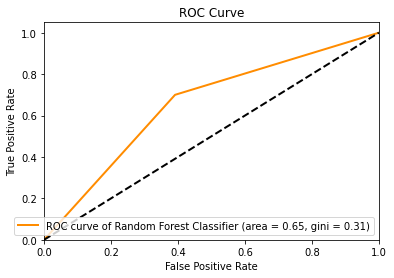

In [9]:
preds = [data['y_pred_test']]
plot_roc_curve(preds,['darkorange'])

- Low and similar train and test accuracy implies an underfitted model. Implies 
a model with high bias. Additional features need to be created. 

## Feature Importance

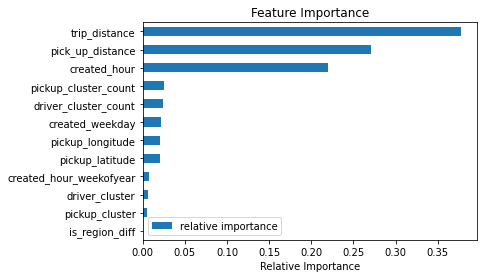

In [10]:
n = 12
plot_df = pd.DataFrame()

features =  ['trip_distance', 'pick_up_distance', 'pickup_latitude', 'pickup_longitude', 'created_weekday', 'created_hour_weekofyear',\
                   'created_hour', 'pickup_cluster', 'driver_cluster', 'is_region_diff', 'driver_cluster_count', 'pickup_cluster_count']

plot_df['relative importance'] = model.feature_importances_[model.feature_importances_.argsort()[::-1][:n]]

features_order = []
for idx in model.feature_importances_.argsort()[::-1][:n].tolist():
    features_order.append(features[idx])
    
plot_df.index = features_order
plot_df.sort_values(by = 'relative importance', inplace = True)


plot_df.plot.barh(title = 'Feature Importance')
plt.xlabel('Relative Importance')
plt.show()

In [ ]:
# for regression
#fig,ax = plt.subplots(ncols=2)
#ax[0].scatter(data['y_pred_test'], data['y_test'], s=0.1, alpha=0.1)
#ax[0].set_xlabel('log(prediction)')
#ax[0].set_ylabel('log(ground truth)')
#ax[1].scatter(np.exp(data['y_pred_test']), data['y_test'], s=0.1, alpha=0.1)
#ax[1].set_xlabel('prediction')
#ax[1].set_ylabel('ground truth')
#plt.show()